In [1]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour

In [2]:
#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()
    # x데이터로 추론한 y값 -> 예를 들어 (x,y)가 통상적으로 (10,20) (20,40) 나왔으므로 x가 30이면 y는 60나올것이다, 에서 60

    sqErrors = (predictions - y) ** 2
    # 오차제곱합, (추정치-실제y값)^2,

    J = (1.0 / (2 * m)) * sqErrors.sum()
    # 오차제곱합을 이용해 구해낸 기울기 -> 회귀직선의 alpha 값
    return J

In [3]:
def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    # 경사하강법 알고리즘을 이용하여 theta를 학습한다.
    
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

        #x가 theta 값일 때, j_history라는 최소값이 나온다. -> 회귀직선의 betha값
    return theta, J_history

In [4]:
#Load the dataset
data = loadtxt('ex1data1.txt', delimiter=',')
# 데이터를 가져온다

In [5]:
x = data[:, 0]
y = data[:, 1]

#x는 데이터의 첫번째 열, y는 데이터의 두번째 열

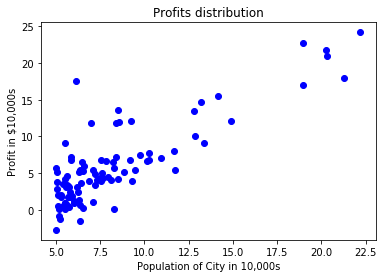

In [6]:
#Plot the data
scatter(x, y, marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
show()
# x축: 인구수, y축: 소득

In [7]:
m = y.size
# 데이터의 갯수

In [8]:
it = ones(shape=(m, 2))
it[:, 1] = x

In [9]:
it
# it은 데이터 갯수만큼의 2차원 배열인데, 첫번째 열은 1로 채우고 두번째 열은 x로 채운다

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [10]:
theta = zeros(shape=(2, 1))

In [11]:
theta
# 이차원의 0으로 초기화된 배열

array([[ 0.],
       [ 0.]])

In [12]:
iterations = 1500
alpha = 0.01
print compute_cost(it, y, theta)

32.0727338775


In [13]:
theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
# 입력한 데이터가 theta일때, j_history라는 최소값이 나온다 -> 선형회귀모형의 b값이 (theta, j_history)에서 결정된다.
print theta

[[-3.63029144]
 [ 1.16636235]]


In [14]:
predict1 = array([1, 3.5]).dot(theta).flatten()
print 'For population = 35,000, we predict a profit of %f' % (predict1 * 10000)

For population = 35,000, we predict a profit of 4519.767868


In [15]:
predict2 = array([1, 7.0]).dot(theta).flatten()
print 'For population = 70,000, we predict a profit of %f' % (predict2 * 10000)

For population = 70,000, we predict a profit of 45342.450129


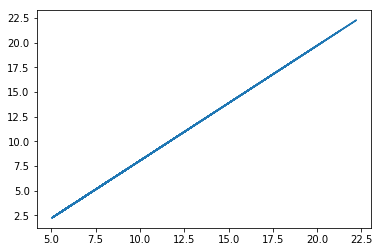

In [16]:
result = it.dot(theta).flatten()
plot(data[:, 0], result)
show()
# alpha라는 기울기와 betha라는 상수를 이용해 그려 낸 기울기 완성.